## Задание 6
Вы могли заметить из прошлого задания, что просмотры постов "колеблются" в течение дня. Вопрос: а отличается ли распределение дневной активности пользователей от распределения публикации постов? В качестве прокси времени публикации возьмите время первого просмотра поста.  

Визуализируйте оба распределения для каждого часа дня и выберите правильные варианты ответа:  
- [ ] Примерно с 9 утра до 4 вечера активность пользователей одинаковая, с небольшой "просадкой" посередине
- [ ] Больше всего постов публикуется в районе 8 вечера
- [ ] Пики активности пользователей и публикации постов не совпадают
- [ ] Для активности пользователей характерен линейный рост в течение дня, сопровождающийся падением
- [ ] Посты публикуются круглосуточно
- [ ] Наименьшая активность пользователей наблюдается в 5 утра

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

from read_db import Getch

In [45]:
sns.set(rc={'figure.figsize': (10, 4), 'figure.dpi': 200}, font_scale=0.5)

In [18]:
activity_query = """
SELECT 
  toStartOfHour(time) time, 
  formatDateTime(time, '%R') as hour_min,
  count(user_id) count_actions
FROM simulator_20220420.feed_actions 
GROUP BY time
ORDER BY time
"""

In [19]:
activity_data = Getch(activity_query).df

In [20]:
posts_query = """
SELECT 
  publication_date, 
  formatDateTime(publication_date, '%R') as hour_min,
  count(post_id) count_posts
FROM (
  SELECT
    post_id,
    min(toStartOfHour(time)) publication_date
  FROM simulator_20220420.feed_actions
  GROUP BY post_id
)
GROUP BY publication_date
ORDER BY publication_date
"""

In [21]:
post_data = Getch(posts_query).df

In [22]:
activity_data.head()

,time,hour_min,count_actions
0,2022-03-08 00:00:00,00:00,61
1,2022-03-08 01:00:00,01:00,65
2,2022-03-08 02:00:00,02:00,45
3,2022-03-08 03:00:00,03:00,30
4,2022-03-08 04:00:00,04:00,38


In [23]:
post_data.head()

,publication_date,hour_min,count_posts
0,2022-03-08 00:00:00,00:00,3
1,2022-03-08 12:00:00,12:00,1
2,2022-03-08 14:00:00,14:00,3
3,2022-03-08 15:00:00,15:00,4
4,2022-03-08 16:00:00,16:00,5


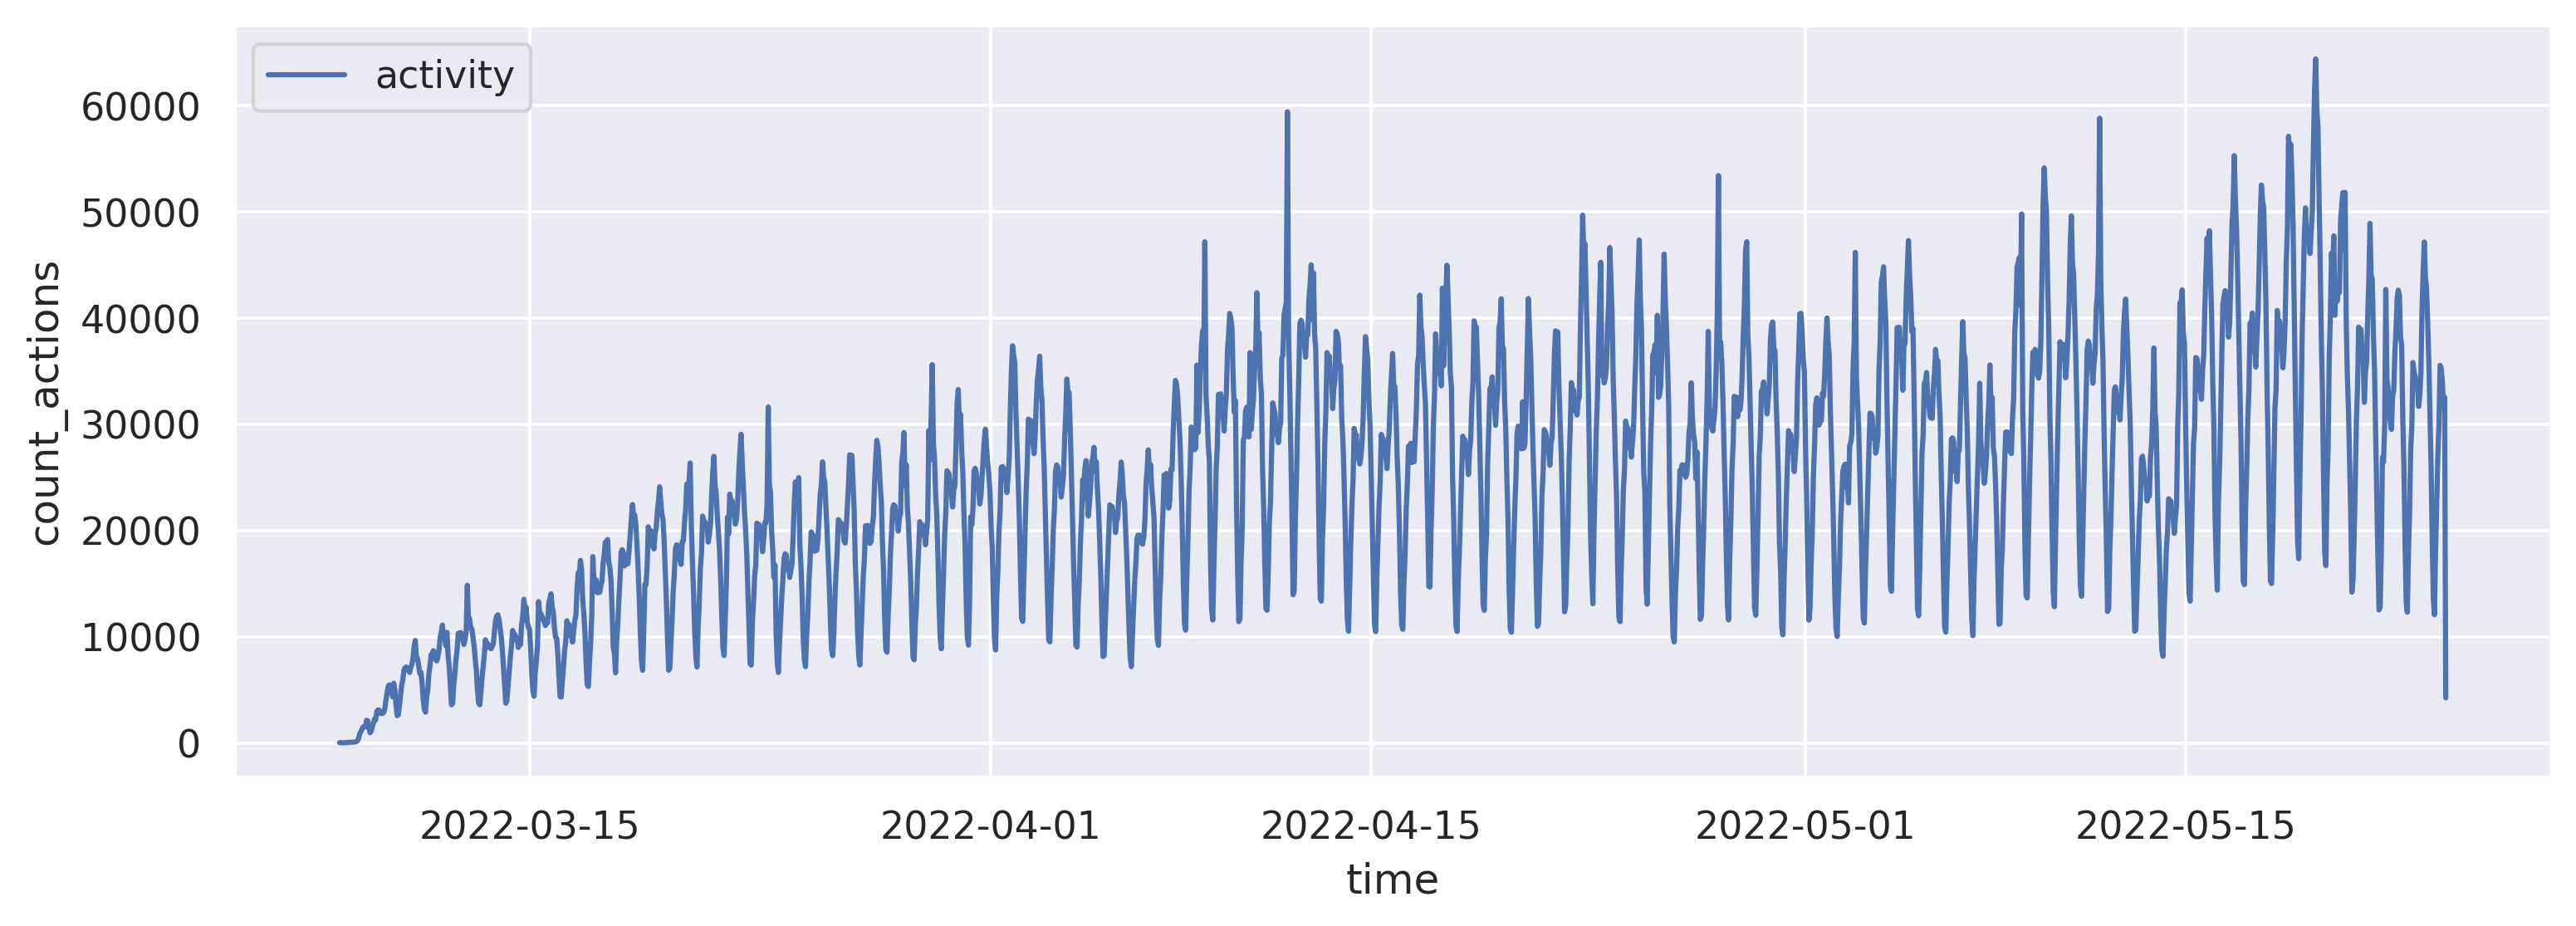

In [29]:
sns.lineplot(x=activity_data['time'], y=activity_data['count_actions'], label='activity')

plt.show()

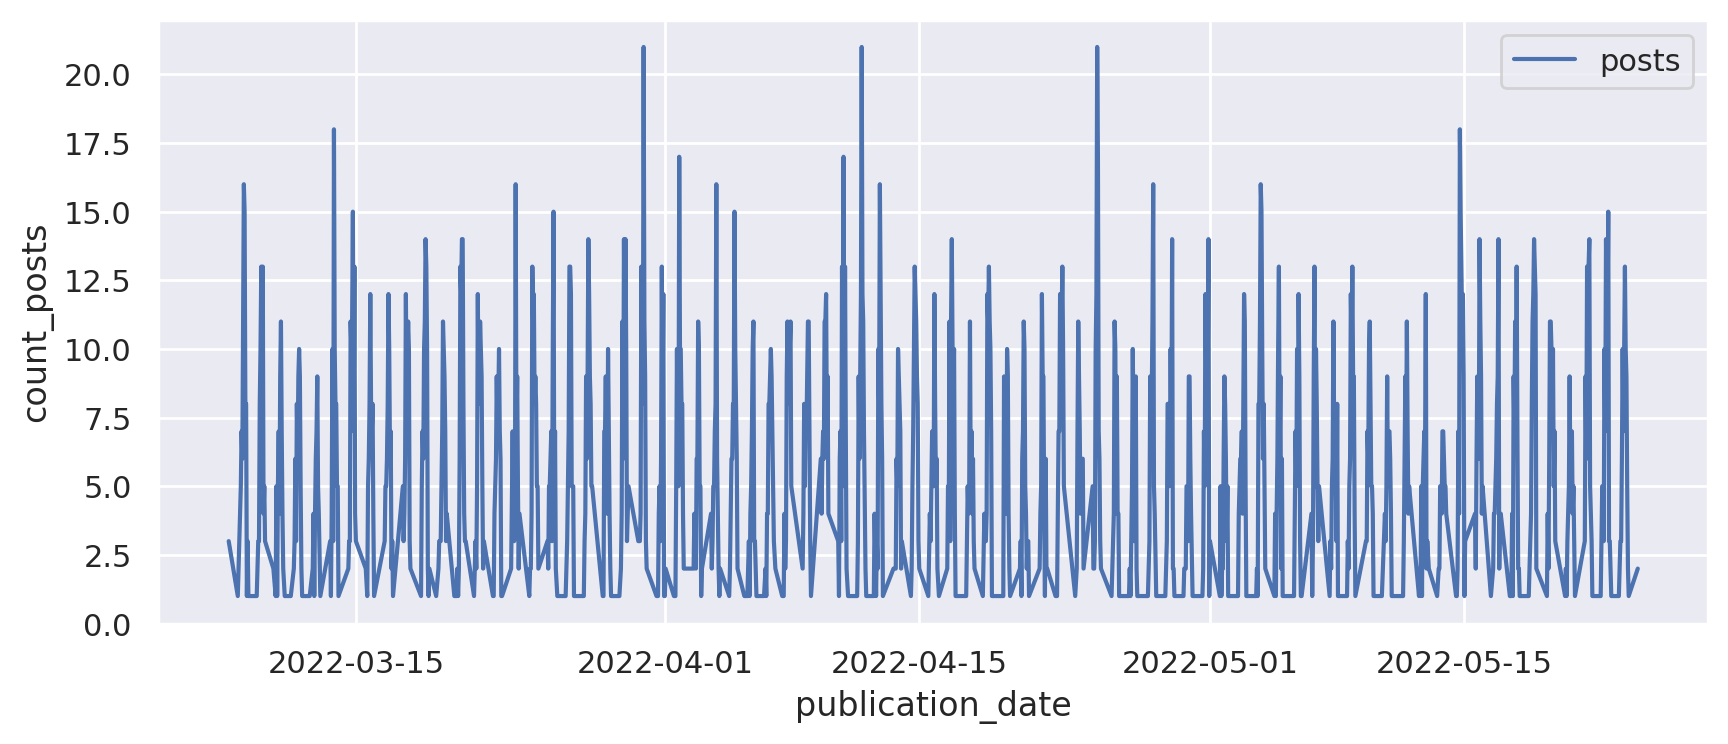

In [40]:
sns.lineplot(x=post_data['publication_date'], y=post_data['count_posts'], label='posts')
plt.show()

<AxesSubplot:xlabel='hour_min', ylabel='count_actions'>

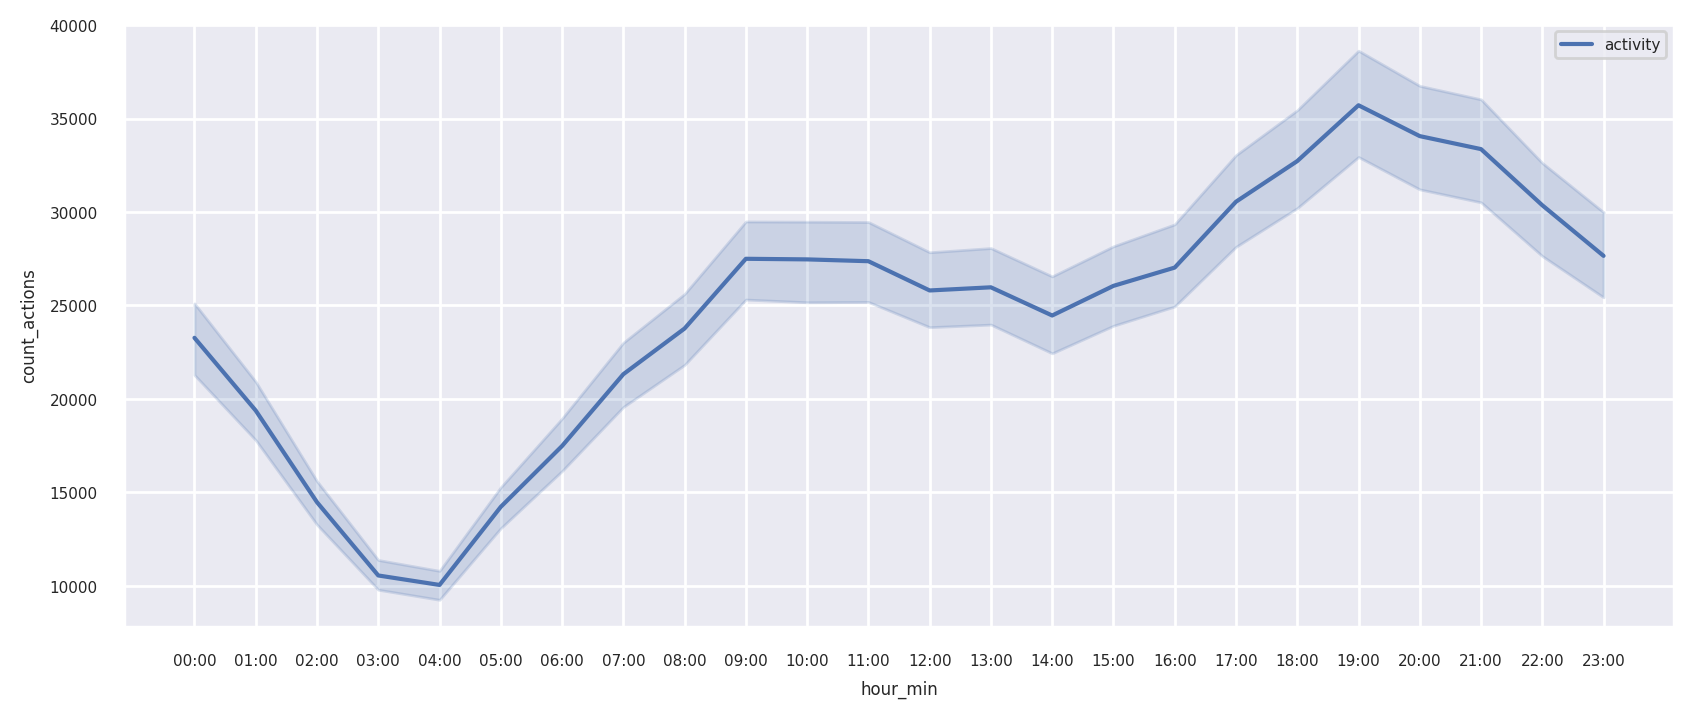

In [46]:
sns.lineplot(x=activity_data.sort_values(['hour_min'])['hour_min'], y=activity_data.sort_values(['hour_min'])['count_actions'], label='activity')

<AxesSubplot:xlabel='hour_min', ylabel='count_posts'>

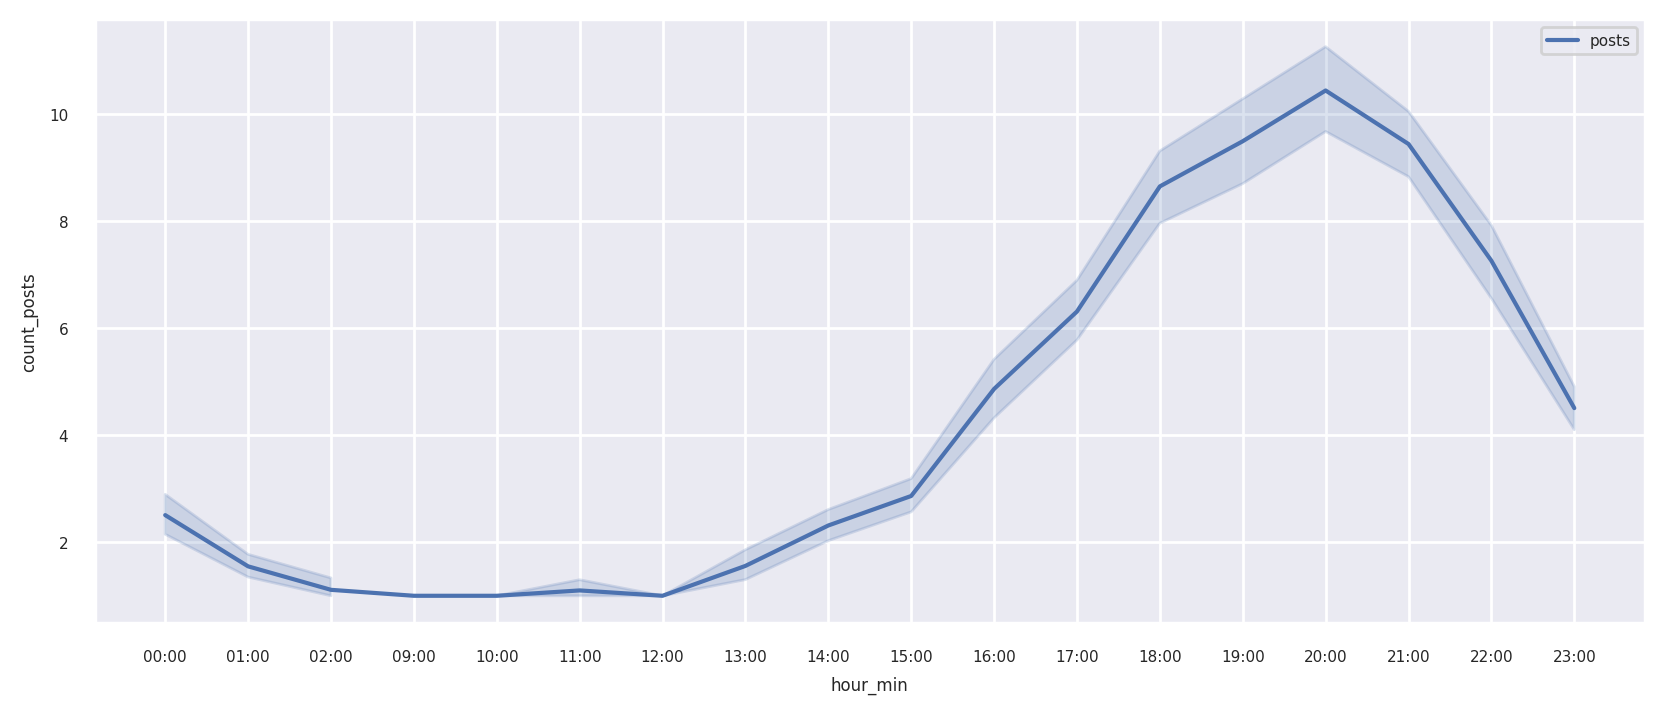

In [47]:
sns.lineplot(x=post_data.sort_values(['hour_min'])['hour_min'], y=post_data.sort_values(['hour_min'])['count_posts'], label='posts')